# Internal Link Analysis

This code will run an internal link analysis on your site, categorise pages and then visualise the data.<br>
The quality of output will depend on how well the website has been set up! For example, run the code on p-tech.org.uk 😆.<br><br>
This example will use one of my favourite eCommerce websites: https://shop.pimoroni.com/. <br>
You need to do a Screaming Frog crawl and export 'Internal All' as csv. It will save as internal_all.csv.<br>
This can be done with the free version of Screaming Frog.<br>
The internal_all_pimoroni.csv can be downloaded from Github and Moodle > Resources.<br>

#### Why are internal links important? 
Internal links are links that go from one page on a domain to a different page on the same domain.

These types of links are helpful for three reasons:

- They allow users to navigate a website.
- They help establish an information hierarchy for the given website.
- They help spread link equity (ranking power) around websites.
Source: Moz.com<br><br>

Based on code from @rvth

In [2]:
# install the libs
import pandas as pd
import re
import numpy as np
import requests
import urllib
import io

In [3]:
# insert crawl csv
data = ('internal_all_pimoroni.csv')  # Where your Screaming Frog crawl is located. 

# update to include columns you would like to include from csv 
columns = ['Address', 'Status Code', 'Indexability', 'Inlinks', 'Unique Inlinks', 'Outlinks', 'Unique Outlinks', 'External Outlinks']
df = pd.read_csv(data , usecols=columns)

In [13]:
display(df)

,Address,Status Code,Indexability,Inlinks,Unique Inlinks,Outlinks,Unique Outlinks,External Outlinks
0,https://shop.pimoroni.com/,200,Indexable,201,67,99,46,9
1,https://shop.pimoroni.com/pages/contact-us,200,Indexable,208,67,94,39,16
2,https://shop.pimoroni.com/collections/makedo,200,Indexable,5,2,84,40,9
3,https://shop.pimoroni.com/collections/cameras,200,Indexable,137,67,84,39,9
4,https://shop.pimoroni.com/products/trilobot,200,Indexable,4,2,90,44,17
...,...,...,...,...,...,...,...,...
73,https://shop.pimoroni.com/collections/all?vend...,200,Non-Indexable,5,3,84,40,9
74,https://shop.pimoroni.com/products/microbit,404,Non-Indexable,1,1,0,0,0
75,https://shop.pimoroni.com/products/raspberry-p...,200,Indexable,4,3,89,44,11
76,https://shop.pimoroni.com/products/raspberry-p...,301,Non-Indexable,1,1,0,0,0


In [14]:
df[(df != 0).all(1)]

,Address,Status Code,Indexability,Inlinks,Unique Inlinks,Outlinks,Unique Outlinks,External Outlinks
0,https://shop.pimoroni.com/,200,Indexable,201,67,99,46,9
1,https://shop.pimoroni.com/pages/contact-us,200,Indexable,208,67,94,39,16
2,https://shop.pimoroni.com/collections/makedo,200,Indexable,5,2,84,40,9
3,https://shop.pimoroni.com/collections/cameras,200,Indexable,137,67,84,39,9
4,https://shop.pimoroni.com/products/trilobot,200,Indexable,4,2,90,44,17
...,...,...,...,...,...,...,...,...
70,https://shop.pimoroni.com/products/camera-cabl...,200,Indexable,5,4,87,42,9
71,https://shop.pimoroni.com/products/micro-hdmi-...,200,Indexable,2,1,85,40,9
73,https://shop.pimoroni.com/collections/all?vend...,200,Non-Indexable,5,3,84,40,9
75,https://shop.pimoroni.com/products/raspberry-p...,200,Indexable,4,3,89,44,11


In [15]:
# Function to create a segment from a URL
def get_segment(Address):
  
        slug = re.search(r'https?:\/\/.*?\//?([^\/]*)\/', Address)
        if slug:
            return slug.group(1)
        else:
            return 'None'

# Add a segment column, and assign each URL a segment   
df['segment'] = df['Address'].apply(lambda x: get_segment(x))

In [16]:
display(df)

,Address,Status Code,Indexability,Inlinks,Unique Inlinks,Outlinks,Unique Outlinks,External Outlinks,segment
0,https://shop.pimoroni.com/,200,Indexable,201,67,99,46,9,None
1,https://shop.pimoroni.com/pages/contact-us,200,Indexable,208,67,94,39,16,pages
2,https://shop.pimoroni.com/collections/makedo,200,Indexable,5,2,84,40,9,collections
3,https://shop.pimoroni.com/collections/cameras,200,Indexable,137,67,84,39,9,collections
4,https://shop.pimoroni.com/products/trilobot,200,Indexable,4,2,90,44,17,products
...,...,...,...,...,...,...,...,...,...
73,https://shop.pimoroni.com/collections/all?vend...,200,Non-Indexable,5,3,84,40,9,collections
74,https://shop.pimoroni.com/products/microbit,404,Non-Indexable,1,1,0,0,0,products
75,https://shop.pimoroni.com/products/raspberry-p...,200,Indexable,4,3,89,44,11,products
76,https://shop.pimoroni.com/products/raspberry-p...,301,Non-Indexable,1,1,0,0,0,products


In [17]:
#create pivot table to get a count of internal links to each segment 
total_internal_links = pd.pivot_table(df, 
                                      index='segment', 
                                      values=['Address', 'Inlinks', 'Unique Inlinks', 'Outlinks', 'Unique Outlinks', 'External Outlinks'], 
                                      aggfunc={'Address':len, 'Inlinks':np.sum, 'Unique Inlinks':np.sum, 'Outlinks':np.sum, 'Unique Outlinks':np.sum, 'External Outlinks':np.sum}
                                     )
total_internal_links

,Address,External Outlinks,Inlinks,Outlinks,Unique Inlinks,Unique Outlinks
segment,,,,,,
None,2,9,379,99,134,46
account,2,0,134,0,134,0
collections,41,342,4108,3192,1978,1492
pages,6,95,1059,545,402,234
products,27,277,79,1923,53,929


<AxesSubplot:xlabel='segment'>

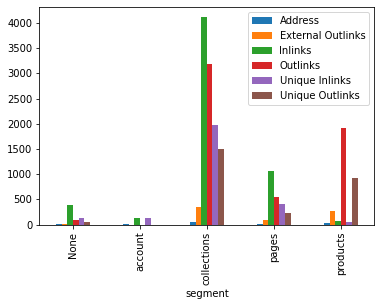

In [19]:
#!pip install matplotlib - You may need to install matplotlib
%matplotlib inline
import numpy as np
total_internal_links.plot.bar() 

<AxesSubplot:ylabel='segment'>

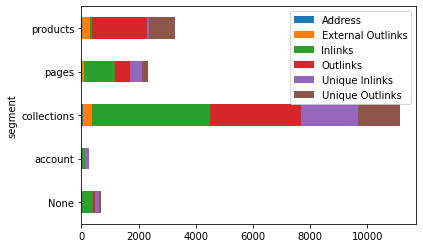

In [20]:
total_internal_links.pivot_table(index='segment').plot.barh(stacked=True)
